In [93]:
import numpy as np
import matplotlib.pyplot as plt

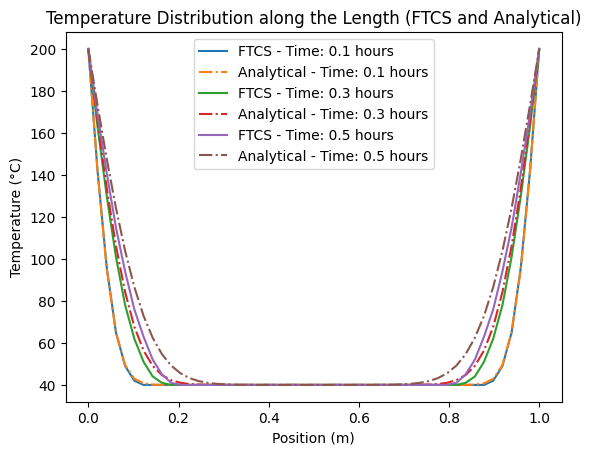

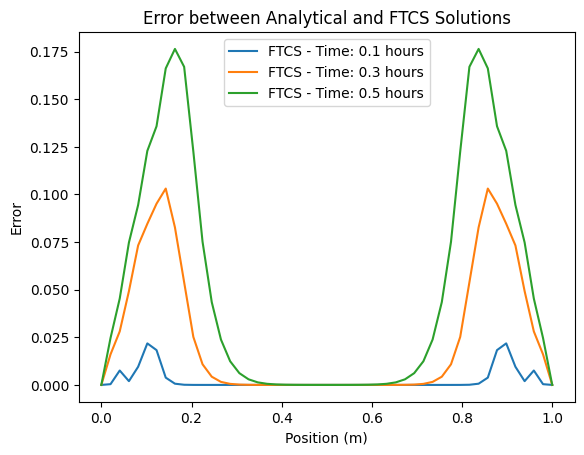

In [94]:
#Explicit Forward Time Central Space (FTCS) scheme

# Parameters
L = 1  # Width of the wall (m)
Ti = 40  # Initial uniform temperature (°C)
Ts = 200  # Surface temperature at the sides (°C)
alpha = 2.6e-6  # Thermal diffusivity (m²/s)
delta_x = 0.02  # Grid size (m)

# Calculate time step
beta = 0.25 # Stability factor
delta_t = beta * (delta_x**2) / alpha # Time steps

# Calculate grid dimensions
IM = int(L / delta_x)


# Analytical solution
def analytical_solution(x, t):
    sum_terms = 0
    for m in range(1, 1000): # Sum upto 1000 terms
        term = np.sin(m * np.pi * x / L) * np.exp(-((m * np.pi / L)**2) * alpha * t)*((1-((-1)**m))/(m*np.pi))
        sum_terms += term
    return Ts + 2 * (Ti - Ts) * sum_terms

def ftcs(T_steps):
    # Initialize temperature distribution
    T = np.full(IM, Ti)  # Initial temperature distribution

    # Dirichlet boundary conditions for sides
    T[0] = Ts
    T[-1] = Ts

    # Implement 1D Explicit Forward Time Central Space (FTCS) scheme
    for _ in range(T_steps):
        T_i = T.copy()

        for i in range(1, IM - 1):
            T[i] = T_i[i] + beta * (
                T_i[i - 1] - 2 * T_i[i] + T_i[i + 1]
            )

    return T

# Temperature distributions along the length for FTCS and the analytical solution
x = np.linspace(0, L, IM)

# Figure for temperature distributions along the length
plt.figure()
for t_space in [0.1*3600, 0.3*3600, 0.5*3600]:
    t_steps = int(t_space/delta_t)

    # FTCS
    T_ftcs = ftcs(t_steps)
    plt.plot(x, T_ftcs, label=f'FTCS - Time: {t_space / 3600:.1f} hours', linestyle='-')

    # Analytical solution
    T_analytical = analytical_solution(x, t_space)
    plt.plot(x, T_analytical, label=f'Analytical - Time: {t_space / 3600:.1f} hours', linestyle='-.')

# The plot for temperature distributions along the length
plt.title('Temperature Distribution along the Length (FTCS and Analytical)')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot x versus ERROR for FTCS
plt.figure()
for t_space in [0.1*3600, 0.3*3600, 0.5*3600]:
    t_steps = int(t_space/delta_t)

    # FTCS
    T_ftcs = ftcs(t_steps)
    error_ftcs = np.abs(analytical_solution(x, t_space) - T_ftcs) / analytical_solution(x, t_space) # error
    plt.plot(x, error_ftcs, label=f'FTCS - Time: {t_space / 3600:.1f} hours', linestyle='-')

# The plot for ERROR
plt.title('Error between Analytical and FTCS Solutions')
plt.xlabel('Position (m)')
plt.ylabel('Error')
plt.legend()
plt.show()


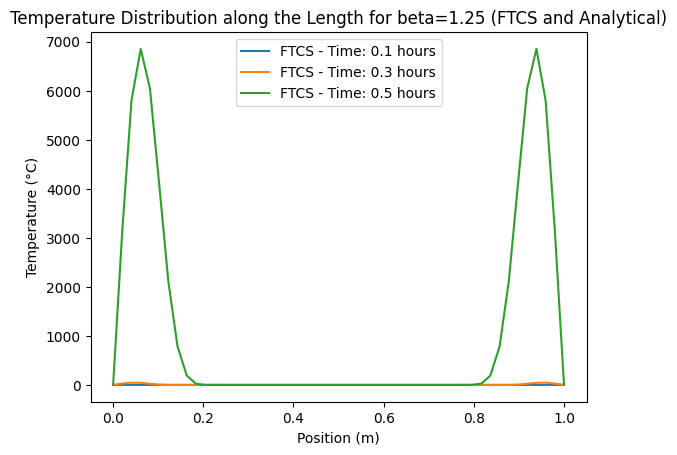

In [95]:
# Verify that the explicit FTCS is unstable

beta = 1.25 # stability Factor greater than 0.5
delta_t = beta * (delta_x**2) / alpha

# Figure for temperature distributions along the length
plt.figure()
for t_space in [0.1*3600, 0.3*3600, 0.5*3600]:
    t_steps = int(t_space/delta_t)

    # FTCS
    T_ftcs = ftcs(t_steps)
    error_ftcs = np.abs(analytical_solution(x, t_space) - T_ftcs) / analytical_solution(x, t_space) # error
    plt.plot(x, error_ftcs, label=f'FTCS - Time: {t_space / 3600:.1f} hours', linestyle='-')


#  The plot for temperature distributions along the length
plt.title('Temperature Distribution along the Length for beta=1.25 (FTCS and Analytical)')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

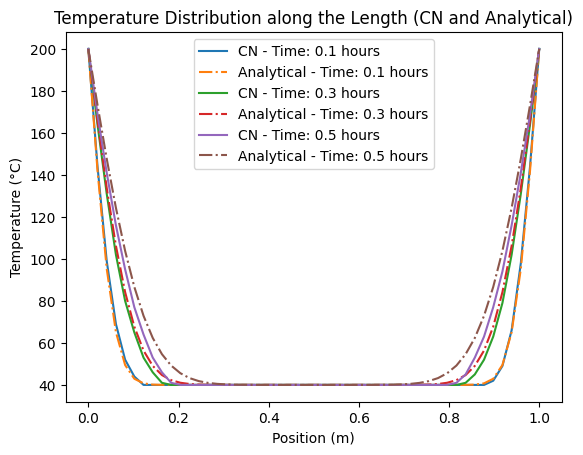

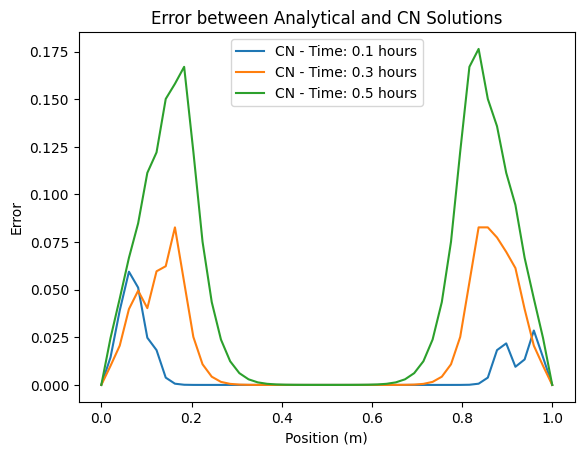

In [96]:
# Crank Nicolson Scheme

# Parameters
L = 1  # Width of the wall (m)
Ti = 40  # Initial uniform temperature (°C)
Ts = 200  # Surface temperature at the sides (°C)
alpha = 2.6e-6  # Thermal diffusivity (m²/s)
delta_x = 0.02  # Grid size (m)

# Calculate time step (Crank-Nicolson stability condition)
beta = 0.25 # Stability factor
delta_t = beta * (delta_x**2) / alpha # Time steps

# Calculate grid dimensions
IM = int(L / delta_x)

# Analytical solution
def analytical_solution(x, t):
    sum_terms = 0
    for m in range(1, 1000):  # Sum up to 1000 terms
        term = np.sin(m * np.pi * x / L) * np.exp(-((m * np.pi / L)**2) * alpha * t)*((1-((-1)**m))/(m*np.pi))
        sum_terms += term
    return Ts + 2 * (Ti - Ts) * sum_terms

def CN(T_steps):
    # Initialize temperature distribution
    T = np.full(IM, Ti)  # Initial temperature distribution

    # Dirichlet boundary conditions for sides
    T[0] = Ts
    T[-1] = Ts

    # Implement Crank Nicolson (CN) scheme
    for t_step in range(T_steps):
        T_i = T.copy()

        for i in range(1, IM - 1):
            T[i] = T_i[i] + beta/2 * (
                T_i[i - 1] - 2 * T_i[i] + T_i[i + 1] +
                T[i - 1] - 2 * T[i] + T[i + 1]
            )

    return T

# Temperature distributions along the length for CN and the analytical solution
x = np.linspace(0, L, IM)

# Figure for temperature distributions along the length
plt.figure()
for t_space in [0.1*3600, 0.3*3600, 0.5*3600]:
    t_steps = int(t_space/delta_t)

    # CN
    T_CN = CN(t_steps)
    plt.plot(x, T_CN, label=f'CN - Time: {t_space / 3600:.1f} hours', linestyle='-')

    # Analytical solution
    T_analytical = analytical_solution(x, t_space)
    plt.plot(x, T_analytical, label=f'Analytical - Time: {t_space / 3600:.1f} hours', linestyle='-.')


# The plot for temperature distributions along the length
plt.title('Temperature Distribution along the Length (CN and Analytical)')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot x versus ERROR for CN
plt.figure()
for t_space in [0.1*3600, 0.3*3600, 0.5*3600]:
    t_steps = int(t_space/delta_t)

    # CN
    T_CN = CN(t_steps)
    error_CN = np.abs(analytical_solution(x, t_space) - T_CN) / analytical_solution(x, t_space) # error
    plt.plot(x, error_CN, label=f'CN - Time: {t_space / 3600:.1f} hours', linestyle='-')

# The plot for ERROR
plt.title('Error between Analytical and CN Solutions')
plt.xlabel('Position (m)')
plt.ylabel('Error')
plt.legend()
plt.show()
